# **Linear Regression in Python**

**Code Attribution and Modifications**

This code was originally developed by **Dr. Minooei** as part of the Data Science course at **Tosea Institute**. I have made minor changes to the original code to adapt it for a similar project. My intention in sharing this version is to provide a useful reference for others working on related projects and to contribute to the data science community.

All credit for the foundational structure of the code goes to Dr. Minooei and the Tosea Institute. Any modifications or adaptations made are my own and are intended to enhance the original work for broader use.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/d/amirasadisamani/car-price-prediction/car_price.csv


## Read Data

In [2]:
car_data = pd.read_csv('/kaggle/input/d/amirasadisamani/car-price-prediction/car_price.csv')

In [3]:
car_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


**Comprehension of the Business Inquiry**

Suggested Pricing for Pre-owned Vehicles

Marketing Criteria: **80%** of forecasts should range within **-15%** and **+15%** of the real price

## **Data inspection**

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1325 non-null   int64 
 1   Age        1325 non-null   int64 
 2   KM         1325 non-null   int64 
 3   FuelType   1325 non-null   object
 4   HP         1325 non-null   int64 
 5   MetColor   1325 non-null   int64 
 6   Automatic  1325 non-null   int64 
 7   CC         1325 non-null   int64 
 8   Doors      1325 non-null   int64 
 9   Weight     1325 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 103.6+ KB


In [5]:
car_data.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [6]:
car_data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

**Price**    : Sales price in Euro

**Age**      : Age of a used car in month

**KM**       : Kilometerage

**FuelType** : Petrol, Diesel, CNG

**HP**       : Horse power

**MetColor** : 1 : if Metallic color, 0 : Not

**Automatic**: 1 : if Aoutomatic, 0 : Not

**CC**       : Engine displacement in cc

**Doors**   : # of doors

**Weight**   : Weight in Kilogram

In [7]:
# Gain a better understanding of data and learn how to interpret labeled data and features."
car_data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,9939.403019,59.189434,72338.591698,100.439245,0.664151,0.053585,1557.720000,4.002264,1064.744906
std,2357.685657,15.246154,36136.813322,12.931155,0.472465,0.225282,183.902799,0.952415,41.031192
min,4350.000000,13.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8250.000000,50.000000,47211.000000,86.000000,0.000000,0.000000,1400.000000,3.000000,1035.000000
50%,9500.000000,62.000000,66000.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1060.000000
75%,10995.000000,71.000000,89800.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1079.000000
max,16950.000000,80.000000,243000.000000,116.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1325 non-null   int64 
 1   Age        1325 non-null   int64 
 2   KM         1325 non-null   int64 
 3   FuelType   1325 non-null   object
 4   HP         1325 non-null   int64 
 5   MetColor   1325 non-null   int64 
 6   Automatic  1325 non-null   int64 
 7   CC         1325 non-null   int64 
 8   Doors      1325 non-null   int64 
 9   Weight     1325 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 103.6+ KB


**Continuous variables distribution**

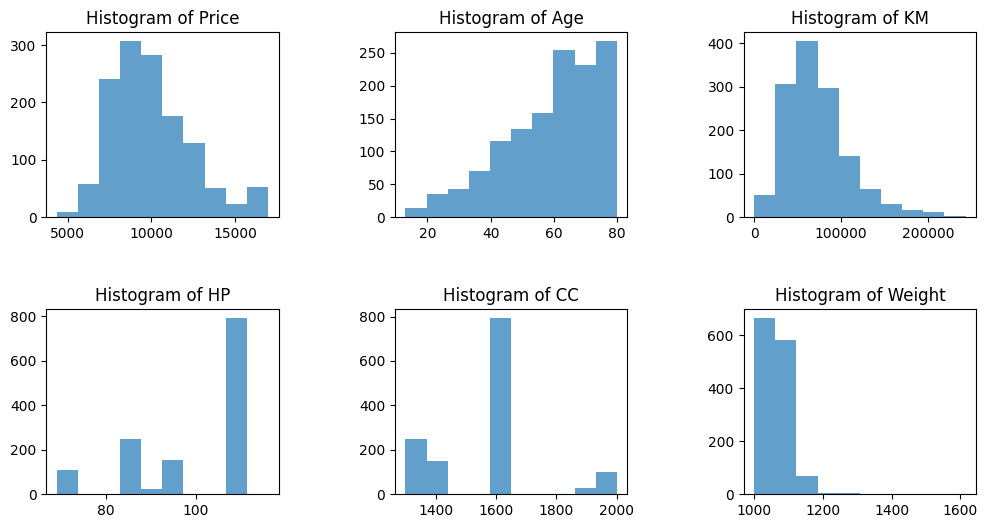

In [9]:
var_ind = [0, 1, 2, 4, 7, 9]
plot = plt.figure(figsize=(12,6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 7):
    a = plot.add_subplot(2, 3, i)
    a.hist(car_data.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text('Histogram of ' + car_data.columns[var_ind[i - 1]])

**Box plot of price**

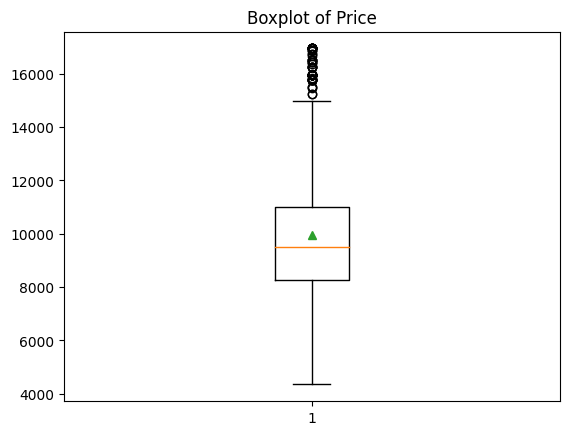

In [10]:
plt.boxplot(car_data['Price'], showmeans = True)
plt.title('Boxplot of Price')
plt.show()

**Correlation analysis**

In [11]:
cont_var = ['Price', 'Age','KM', 'HP','CC', 'Weight']
corr_table = round(car_data[cont_var].corr(method = 'pearson'), 2)
corr_table

,Price,Age,KM,HP,CC,Weight
Price,1.00,-0.84,-0.52,0.20,0.01,0.29
Age,-0.84,1.00,0.39,-0.05,-0.05,-0.27
KM,-0.52,0.39,1.00,-0.33,0.39,0.19
HP,0.20,-0.05,-0.33,1.00,-0.02,-0.08
CC,0.01,-0.05,0.39,-0.02,1.00,0.66
Weight,0.29,-0.27,0.19,-0.08,0.66,1.00


**Scatter Plot**

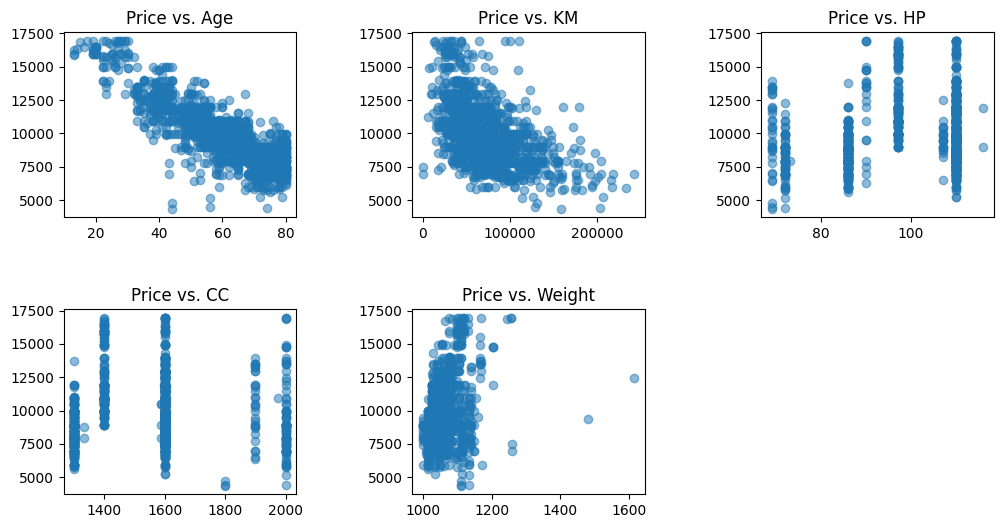

In [12]:
var_ind = [1, 2, 4, 7, 9]
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 6):
    a = plot.add_subplot(2, 3, i)
    a.scatter(x = car_data.iloc[: , var_ind[i - 1]], y = car_data.iloc[: , 0], alpha = 0.5)
    a.title.set_text('Price vs. ' + car_data.columns[var_ind[i - 1]])

**Categorical variables**

In [13]:
car_data['FuelType'].value_counts()

FuelType
Petrol    1176
Diesel     132
CNG         17
Name: count, dtype: int64

In [14]:
car_data["MetColor"].value_counts()

MetColor
1    880
0    445
Name: count, dtype: int64

In [15]:
car_data["Automatic"].value_counts()

Automatic
0    1254
1      71
Name: count, dtype: int64

In [16]:
car_data["Doors"].value_counts()

Doors
5    600
3    593
4    130
2      2
Name: count, dtype: int64

In [17]:
car_data.loc[car_data['Doors'] == 2,:]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
650,8250,65,80000,Petrol,86,1,0,1300,2,1015
967,7950,71,139145,Diesel,73,0,0,2000,2,1115


**Note:** *Small sample for 2-door cars and CNG*

## Data Preparation

In [18]:
car_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


**Divide Dataset into Train and Test**

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(car_data, test_size= 0.3, random_state= 247)

In [20]:
train.shape

(927, 10)

In [21]:
test.shape

(398, 10)

## Build Linear Regression Models



**Model 1: Simple Linear Regression**

In [22]:
#Price vs KM
#Define the feature set X 

X_train = train['KM']
X_train = sm.add_constant(X_train) # adding a constant

y_train = train['Price']

In [23]:
X_train.head()

,const,KM
1057,1.0,96000
427,1.0,46500
700,1.0,71366
804,1.0,58000
701,1.0,71317


In [24]:
y_train.head()

1057     7250
427     10950
700      9500
804     10495
701      8950
Name: Price, dtype: int64

I prefer to use the class OLS of "statsmodels" library for linear regression instead of "sikitlearn" because the results from "statmodels" are more detailed to understand and tune for better results.

In [25]:
#Regression Model
regmodel = sm.OLS( y_train, X_train)
regmodel_1 = regmodel.fit()
regmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     344.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.17e-65
Time:                        05:23:19   Log-Likelihood:                -8363.9
No. Observations:                 927   AIC:                         1.673e+04
Df Residuals:                     925   BIC:                         1.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.227e+04    145.947     84.092      0.000     1.2e+04    1.26e+04
KM            -0.0332      0.002    -18.568      0.000      -0.037      -0.030
==============================================================================
Omnibus:                       88.838   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.957
Skew:                           0.770   Prob(JB):                     4.01e-26
Kurtosis:                       3.812   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

results :
- R-squared: low R-squared because of using just one feature
- R-squared < 0.05 There is a linear relation between KM and Price
- P>|t| < 0.05 : KM is a significant feature
- Prob(Omnibus) and Jarque-Bera (JB) > 0.05 : Residuals distribution are not normal - bad model

In [26]:
#Check Assumptions of Regression
#Normality of residuals
regmodel_1.resid

1057   -1837.456991
427      219.996239
700     -404.881176
804      146.598014
701     -956.507131
           ...     
33      6017.297758
412     -964.892756
1105    -923.797477
984    -1199.340674
747    -2127.858746
Length: 927, dtype: float64

In [27]:
#Function to plot histogram of residuals
def hist_residuals(model, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(model.resid)
    xp = np.linspace(model.resid.min(), model.resid.max(), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(model.resid, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(model.resid.mean(), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()

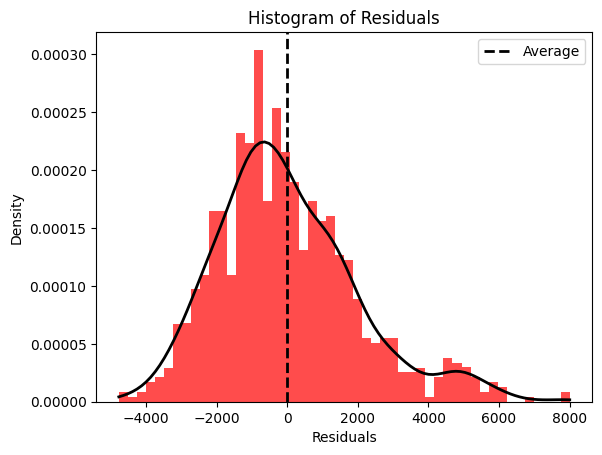

In [28]:
hist_residuals(regmodel_1)

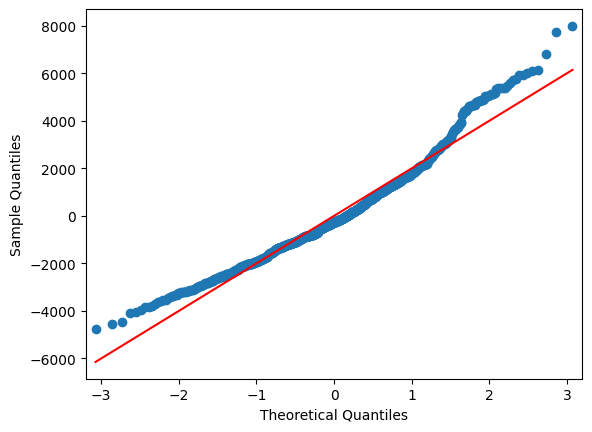

In [29]:
#QQ-plot
sm.qqplot(regmodel_1.resid, line = 's')
plt.show()

In [30]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for 
# Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

regmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     344.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.17e-65
Time:                        05:23:20   Log-Likelihood:                -8363.9
No. Observations:                 927   AIC:                         1.673e+04
Df Residuals:                     925   BIC:                         1.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.227e+04    145.947     84.092      0.000     1.2e+04    1.26e+04
KM            -0.0332      0.002    -18.568      0.000      -0.037      -0.030
==============================================================================
Omnibus:                       88.838   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.957
Skew:                           0.770   Prob(JB):                     4.01e-26
Kurtosis:                       3.812   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note: Residuals are not Normally Distributed!**

In [31]:
#Function to plot residuals vs. fitted values
def residuals_fittedvalues_plot(model):
    #Implement Lowess algorithm
    lowess_res = sm.nonparametric.lowess(model.resid, model.fittedvalues)

    #Scatter plot: residuals vs. fitted values
    plt.scatter(x = model.fittedvalues, y = model.resid, 
                color = 'red', alpha = 0.7, label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.grid()

    #Add LOWESS line
    plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black', 
             alpha = 0.8, linewidth = 2, label = 'LOWESS')
    plt.legend()

    #Top three observations with greates absolute value of the residual
    top3 = abs(model.resid).sort_values(ascending = False)[:3]
    for i in top3.index:
        plt.annotate(i, xy = (model.fittedvalues[i], model.resid[i]), color = 'blue')
    
    return plt.show()

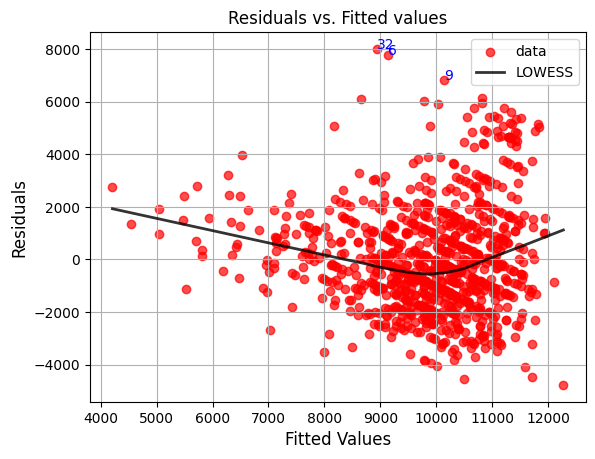

In [32]:
#Residuals vs. fitted values
residuals_fittedvalues_plot(regmodel_1)

There is evidence of heteroscedasticity, and the residuals display a pattern, which violates the assumptions of linear regression.

In [33]:
#Function to check Cook's distance
def influencer_detector(model, thershold = 1):
    
    #create instance of influence
    influence = model.get_influence()

    #Obtain Cook's distance for each observation
    cooks = influence.cooks_distance

    #Check observations w/ Cook's distance greater than thershold
    return np.where(cooks[0] > 1)

In [34]:
#Check Cook's ditance - model 1
influencer_detector(regmodel_1)

(array([], dtype=int64),)

Cook's distance indicates the influence of each observation on the fitted response values. In this case, there is no observation with significant influence.

## Model 2: Quadratic Regression

According to the plot of KM vs. Price, the relation between them is not a smooth linear, and a curved line better describes the relation between them. Therefore, we will try quadratic regression.

In [35]:
train['KM_2'] = train['KM'] ** 2
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2
1057,7250,78,96000,Petrol,86,1,0,1300,3,1015,9216000000
427,10950,56,46500,Petrol,86,0,0,1300,5,1035,2162250000
700,9500,59,71366,Petrol,110,0,0,1600,3,1065,5093105956
804,10495,62,58000,Petrol,110,1,0,1600,3,1065,3364000000
701,8950,65,71317,Petrol,110,0,0,1600,3,1050,5086114489


In [36]:
train['KM_2'].isna().sum()

0

In [37]:
#Define the feature set X 
X_train = train[['KM', 'KM_2']]
X_train = sm.add_constant(X_train) # adding a constant

#Define response variable
y_train = train['Price']

In [38]:
X_train.head()

,const,KM,KM_2
1057,1.0,96000,9216000000
427,1.0,46500,2162250000
700,1.0,71366,5093105956
804,1.0,58000,3364000000
701,1.0,71317,5086114489


In [39]:
#Regression Model
regmodel = sm.OLS(y_train, X_train)
regmodel_2 = regmodel.fit()
regmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.20e-72
Time:                        05:23:22   Log-Likelihood:                -8345.9
No. Observations:                 927   AIC:                         1.670e+04
Df Residuals:                     924   BIC:                         1.671e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.354e+04    253.867     53.346      0.000     1.3e+04     1.4e+04
KM            -0.0671      0.006    -11.440      0.000      -0.079      -0.056
KM_2        1.798e-07   2.97e-08      6.057      0.000    1.22e-07    2.38e-07
==============================================================================
Omnibus:                       82.072   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.382
Skew:                           0.702   Prob(JB):                     6.51e-25
Kurtosis:                       3.957   Cond. No.                     3.88e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

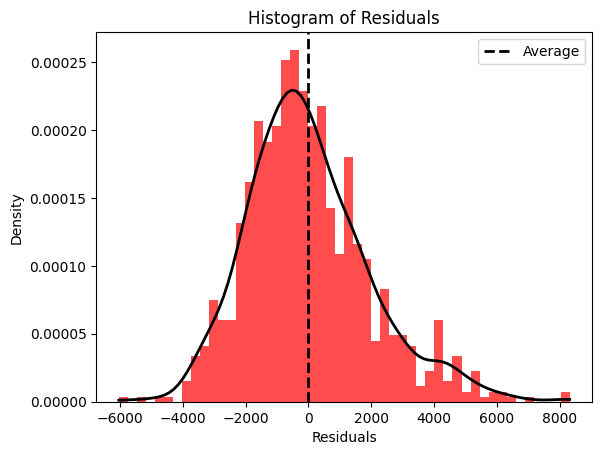

In [40]:
#Check Assumptions of Regression
#Normality of residuals
hist_residuals(regmodel_2)

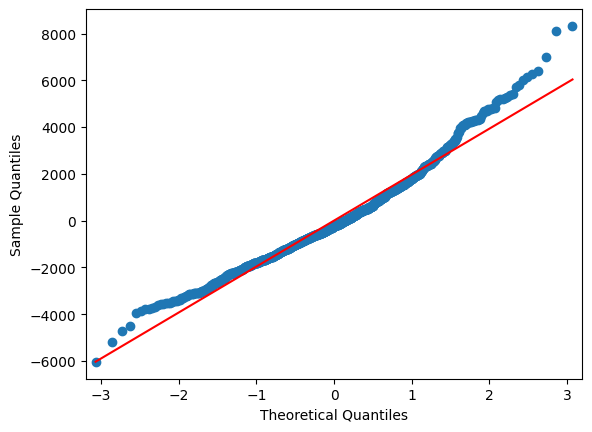

In [41]:
#QQ-plot
sm.qqplot(regmodel_2.resid, line = 's')
plt.show()

In [42]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for 
# Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

regmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.20e-72
Time:                        05:23:23   Log-Likelihood:                -8345.9
No. Observations:                 927   AIC:                         1.670e+04
Df Residuals:                     924   BIC:                         1.671e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.354e+04    253.867     53.346      0.000     1.3e+04     1.4e+04
KM            -0.0671      0.006    -11.440      0.000      -0.079      -0.056
KM_2        1.798e-07   2.97e-08      6.057      0.000    1.22e-07    2.38e-07
==============================================================================
Omnibus:                       82.072   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.382
Skew:                           0.702   Prob(JB):                     6.51e-25
Kurtosis:                       3.957   Cond. No.                     3.88e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

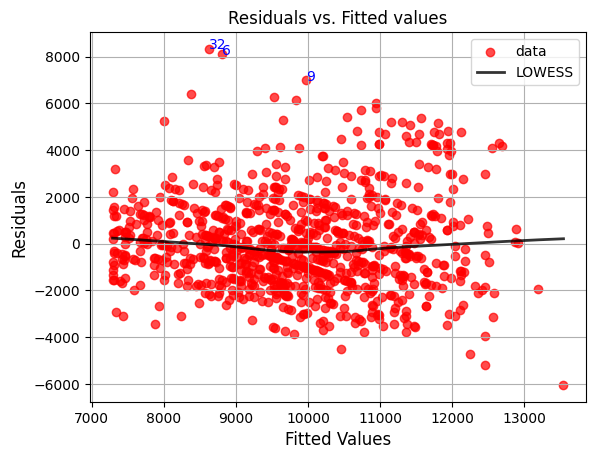

In [43]:
#Residuals vs. Fitted Values
residuals_fittedvalues_plot(regmodel_2)

In [44]:
#Check Cook's ditance - model 2
influencer_detector(regmodel_2)

(array([], dtype=int64),)

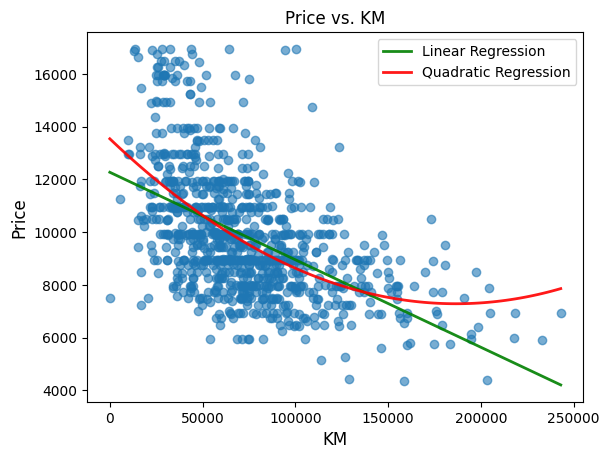

In [45]:
#Linear vs Quadratic Regression
plt.scatter(x = train['KM'], y = train['Price'], alpha = 0.6)

#Linear Regression
params1 = np.polyfit(train['KM'], train['Price'], 1)
xp = np.linspace(train['KM'].min(), train['KM'].max(), 100)
yp1 = np.polyval(params1, xp)
plt.plot(xp, yp1, alpha = 0.9, linewidth = 2, 
         color = 'green', label = 'Linear Regression')

#Quadratic Regression
params2 = np.polyfit(train['KM'], train['Price'], 2)
yp2 = np.polyval(params2, xp)
plt.plot(xp, yp2, alpha = 0.9, linewidth = 2, 
         color = 'red', label = 'Quadratic Regression')

plt.xlabel('KM', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.title('Price vs. KM', fontsize = 12)
plt.legend()
plt.show()

In [46]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [47]:
calc_vif(X_train)
#If VIF > 10 then multicollinearity is high

,variables,VIF
0,const,15.394016
1,KM,11.176942
2,KM_2,11.176942


To address the issue of multicollinearity in this case, we can scale the features.

In [48]:
#Scaled Variable
train['KM_Scaled']   = (train['KM'] - train['KM'].mean()) / train['KM'].std()
train['KM_Scaled_2'] = train['KM_Scaled'] ** 2
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2,KM_Scaled,KM_Scaled_2
1057,7250,78,96000,Petrol,86,1,0,1300,3,1015,9216000000,0.626899,0.393002
427,10950,56,46500,Petrol,86,0,0,1300,5,1035,2162250000,-0.713920,0.509682
700,9500,59,71366,Petrol,110,0,0,1600,3,1065,5093105956,-0.040369,0.001630
804,10495,62,58000,Petrol,110,1,0,1600,3,1065,3364000000,-0.402417,0.161939
701,8950,65,71317,Petrol,110,0,0,1600,3,1050,5086114489,-0.041696,0.001739


In [49]:
train[['KM_Scaled', 'KM_Scaled_2']].isna().sum()

KM_Scaled      0
KM_Scaled_2    0
dtype: int64

In [50]:
#Define the feature set X 
X_train = train[['KM_Scaled', 'KM_Scaled_2']]
X_train = sm.add_constant(X_train) # adding a constant

#Define response variable
y_train = train['Price']

In [51]:
#Regression Model
regmodel = sm.OLS(y_train, X_train)
regmodel_2 = regmodel.fit()
regmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.20e-72
Time:                        05:23:25   Log-Likelihood:                -8345.9
No. Observations:                 927   AIC:                         1.670e+04
Df Residuals:                     924   BIC:                         1.671e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9610.6542     76.285    125.983      0.000    9460.941    9760.367
KM_Scaled   -1508.8863     79.919    -18.880      0.000   -1665.730   -1352.043
KM_Scaled_2   245.0384     40.453      6.057      0.000     165.649     324.428
==============================================================================
Omnibus:                       82.072   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.382
Skew:                           0.702   Prob(JB):                     6.51e-25
Kurtosis:                       3.957   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

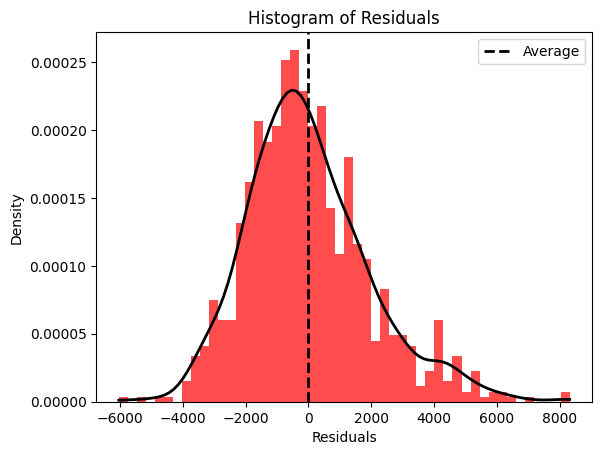

In [52]:
#Plot histogram of residuals
#Histogram of residuals - model 2
hist_residuals(regmodel_2)

In [53]:
calc_vif(X_train)
#If VIF > 10 then multicollinearity is high

,variables,VIF
0,const,1.390028
1,KM_Scaled,1.523944
2,KM_Scaled_2,1.523944


## Model 3: Use All Variables

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 1057 to 747
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        927 non-null    int64  
 1   Age          927 non-null    int64  
 2   KM           927 non-null    int64  
 3   FuelType     927 non-null    object 
 4   HP           927 non-null    int64  
 5   MetColor     927 non-null    int64  
 6   Automatic    927 non-null    int64  
 7   CC           927 non-null    int64  
 8   Doors        927 non-null    int64  
 9   Weight       927 non-null    int64  
 10  KM_2         927 non-null    int64  
 11  KM_Scaled    927 non-null    float64
 12  KM_Scaled_2  927 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 101.4+ KB


In [55]:
#Change Dtype of categorical columns to object
train[['FuelType', 
       'MetColor', 
       'Automatic', 
       'Doors']] = train[['FuelType', 
                          'MetColor', 
                          'Automatic', 
                          'Doors']].apply(lambda col: col.astype('category'), 
                                          axis = 0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 1057 to 747
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Price        927 non-null    int64   
 1   Age          927 non-null    int64   
 2   KM           927 non-null    int64   
 3   FuelType     927 non-null    category
 4   HP           927 non-null    int64   
 5   MetColor     927 non-null    category
 6   Automatic    927 non-null    category
 7   CC           927 non-null    int64   
 8   Doors        927 non-null    category
 9   Weight       927 non-null    int64   
 10  KM_2         927 non-null    int64   
 11  KM_Scaled    927 non-null    float64 
 12  KM_Scaled_2  927 non-null    float64 
dtypes: category(4), float64(2), int64(7)
memory usage: 76.6 KB


In [56]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train[['FuelType', 
                                'MetColor', 
                                'Automatic', 
                                'Doors']], dtype = int)
dummies.head()

,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,MetColor_0,MetColor_1,Automatic_0,Automatic_1,Doors_2,Doors_3,Doors_4,Doors_5
1057,0,0,1,0,1,1,0,0,1,0,0
427,0,0,1,1,0,1,0,0,0,0,1
700,0,0,1,1,0,1,0,0,1,0,0
804,0,0,1,0,1,1,0,0,1,0,0
701,0,0,1,1,0,1,0,0,1,0,0


In [57]:
train.drop(columns = ['Price', 
                      'KM', 
                      'KM_2',
                      'FuelType', 
                      'MetColor', 
                      'Automatic', 
                      'Doors'])

,Age,HP,CC,Weight,KM_Scaled,KM_Scaled_2
1057,78,86,1300,1015,0.626899,0.393002
427,56,86,1300,1035,-0.713920,0.509682
700,59,110,1600,1065,-0.040369,0.001630
804,62,110,1600,1065,-0.402417,0.161939
701,65,110,1600,1050,-0.041696,0.001739
...,...,...,...,...,...,...
33,22,97,1400,1110,0.059367,0.003524
412,53,110,1600,1075,-0.619954,0.384344
1105,70,72,2000,1135,0.352342,0.124145
984,76,110,1600,1050,1.433503,2.054930


For a linear regression model, we should have n-1 dummy variables. Therefore, we will remove one of the less critical features from each category variable.

In [58]:
#Define the feature set X 
X_ = train.drop(columns = ['Price', 
                           'KM', 
                           'KM_2',
                           'FuelType', 
                           'MetColor', 
                           'Automatic', 
                           'Doors'])
X_train = pd.concat([X_, dummies[['FuelType_Diesel', 
                                  'FuelType_Petrol', 
                                  'MetColor_1', 
                                  'Automatic_1',
                                  'Doors_3', 
                                  'Doors_4', 
                                  'Doors_5']]], axis = 1)
X_train = sm.add_constant(X_train) # adding a constant

#Define response variable
y_train = train['Price']

In [59]:
X_train.head()

,const,Age,HP,CC,Weight,KM_Scaled,KM_Scaled_2,FuelType_Diesel,FuelType_Petrol,MetColor_1,Automatic_1,Doors_3,Doors_4,Doors_5
1057,1.0,78,86,1300,1015,0.626899,0.393002,0,1,1,0,1,0,0
427,1.0,56,86,1300,1035,-0.713920,0.509682,0,1,0,0,0,0,1
700,1.0,59,110,1600,1065,-0.040369,0.001630,0,1,0,0,1,0,0
804,1.0,62,110,1600,1065,-0.402417,0.161939,0,1,1,0,1,0,0
701,1.0,65,110,1600,1050,-0.041696,0.001739,0,1,0,0,1,0,0


In [60]:
#Regression Model
regmodel = sm.OLS(y_train, X_train)
regmodel_3 = regmodel.fit()
regmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     252.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.19e-291
Time:                        05:23:27   Log-Likelihood:                -7803.5
No. Observations:                 927   AIC:                         1.563e+04
Df Residuals:                     913   BIC:                         1.570e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5474.2203   1595.162      3.432      0.001    2343.610    8604.831
Age              -114.7154      3.071    -37.358      0.000    -120.742    -108.689
HP                -30.2068     17.566     -1.720      0.086     -64.681       4.267
CC                  3.3987      1.364      2.491      0.013       0.721       6.076
Weight              8.2569      1.291      6.394      0.000       5.723      10.791
KM_Scaled        -414.7742     56.703     -7.315      0.000    -526.058    -303.490
KM_Scaled_2       -66.1663     24.996     -2.647      0.008    -115.223     -17.109
FuelType_Diesel -2658.3311   1186.162     -2.241      0.025   -4986.253    -330.409
FuelType_Petrol   550.6302    331.727      1.660      0.097    -100.406    1201.667
MetColor_1          1.2810     77.341      0.017      0.987    -150.505     153.067
Automatic_1       351.9300    170.958      2.059      0.040      16.413     687.447
Doors_3           -85.1223    785.411     -0.108      0.914   -1626.542    1456.298
Doors_4           -78.5909    792.851     -0.099      0.921   -1634.613    1477.431
Doors_5            65.2673    786.606      0.083      0.934   -1478.498    1609.032
==============================================================================
Omnibus:                       46.007   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.058
Skew:                          -0.194   Prob(JB):                     4.23e-28
Kurtosis:                       4.764   Cond. No.                     9.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will check the features with high P>|t| values to determine if they should be dropped from the model.

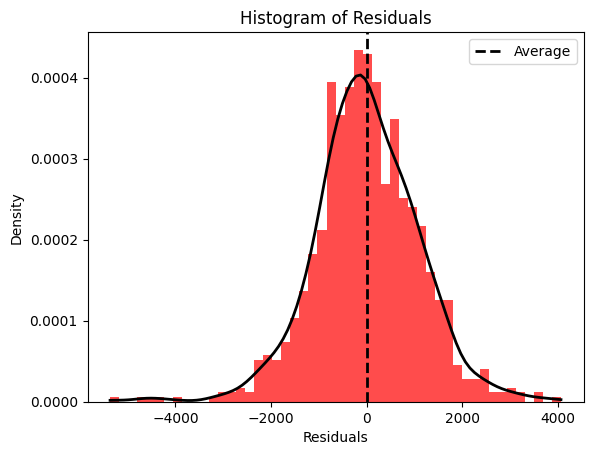

In [61]:
#Plot histogram of residuals
hist_residuals(regmodel_3)

In [62]:
#Removing variables: MetColor
train.groupby('MetColor')['Price'].mean()

/tmp/ipykernel_17/2023363369.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('MetColor')['Price'].mean()


MetColor
0    9636.905660
1    9969.533662
Name: Price, dtype: float64

In [63]:
#Removing variables: Doors 
train.groupby('Doors')['Price'].mean()

/tmp/ipykernel_17/1962711300.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('Doors')['Price'].mean()


Doors
2     8100.000000
3     9570.384075
4     9188.044444
5    10309.568627
Name: Price, dtype: float64

In [64]:
#Removing variables: HP
train[['Price', 'HP']].corr()

,Price,HP
Price,1.000000,0.220501
HP,0.220501,1.000000


Text(0, 0.5, 'Price')

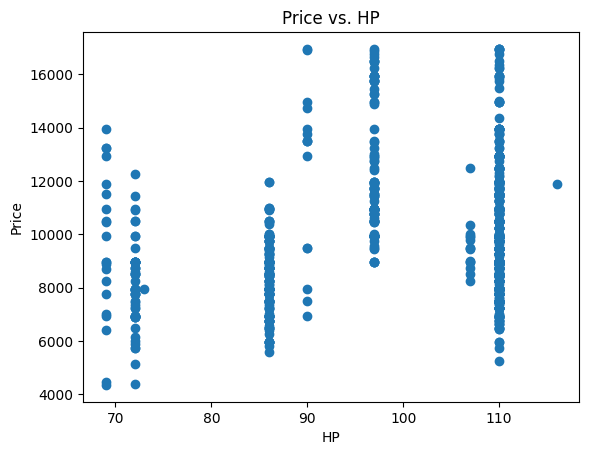

In [65]:
#Scatter Plot for Price vs. HP
plt.scatter(x = train['HP'], y = train['Price'])
plt.title('Price vs. HP')
plt.xlabel('HP')
plt.ylabel('Price')

The investigation above shows no significant relation between 'Price' and "HP, MetColor, Doors," so we will drop them.

In [66]:
#Removing variables: HP, MetColor, and Doors
#Define the feature set X 
X_train = X_train.drop(columns = ['HP', 
                                  'MetColor_1',
                                  'Doors_3', 
                                  'Doors_4', 
                                  'Doors_5'])

#Define response variable
y_train = train['Price']

In [67]:
X_train.head()

,const,Age,CC,Weight,KM_Scaled,KM_Scaled_2,FuelType_Diesel,FuelType_Petrol,Automatic_1
1057,1.0,78,1300,1015,0.626899,0.393002,0,1,0
427,1.0,56,1300,1035,-0.713920,0.509682,0,1,0
700,1.0,59,1600,1065,-0.040369,0.001630,0,1,0
804,1.0,62,1600,1065,-0.402417,0.161939,0,1,0
701,1.0,65,1600,1050,-0.041696,0.001739,0,1,0


In [68]:
#Regression Model
regmodel = sm.OLS(y_train, X_train)
regmodel_3 = regmodel.fit()
regmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     408.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.87e-296
Time:                        05:23:30   Log-Likelihood:                -7807.1
No. Observations:                 927   AIC:                         1.563e+04
Df Residuals:                     918   BIC:                         1.568e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5081.9075   1248.993      4.069      0.000    2630.694    7533.121
Age              -113.2139      2.934    -38.590      0.000    -118.972    -107.456
CC                  1.1125      0.332      3.355      0.001       0.462       1.763
Weight              8.7955      1.164      7.554      0.000       6.511      11.081
KM_Scaled        -407.0205     56.665     -7.183      0.000    -518.229    -295.812
KM_Scaled_2       -61.6276     24.667     -2.498      0.013    -110.038     -13.217
FuelType_Diesel  -730.8003    359.363     -2.034      0.042   -1436.069     -25.531
FuelType_Petrol   601.5136    330.855      1.818      0.069     -47.805    1250.833
Automatic_1       363.9120    167.519      2.172      0.030      35.147     692.677
==============================================================================
Omnibus:                       54.797   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.219
Skew:                          -0.257   Prob(JB):                     1.97e-34
Kurtosis:                       4.938   Cond. No.                     6.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing the insignificant features did not decrease the fitting metrics, such as R-squared, compared to the last model. It is good news.

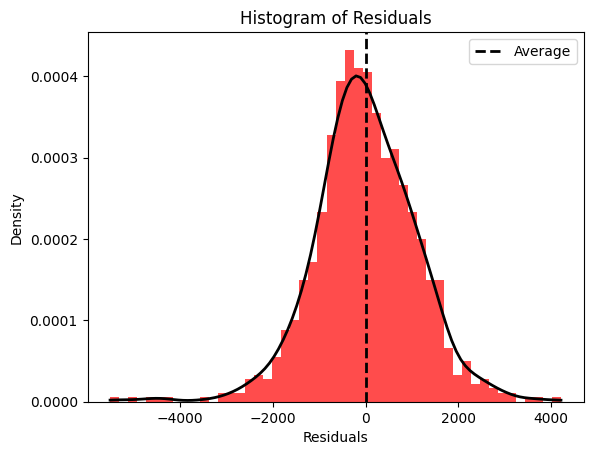

In [69]:
#Check Assumptions of Regression
#Normality of residuals
#Plot histogram of residuals
hist_residuals(regmodel_3)

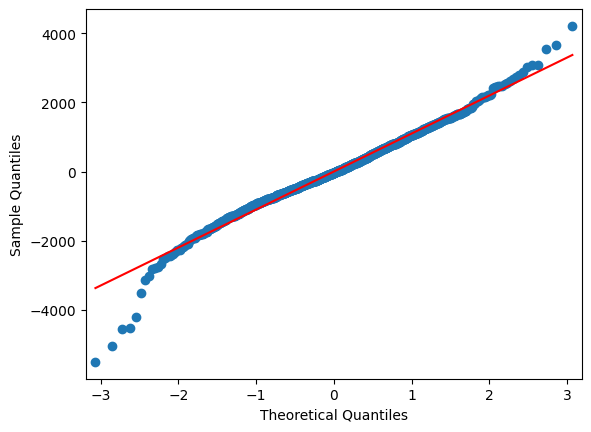

In [70]:
#QQ-plot
sm.qqplot(regmodel_3.resid, line = 's')
plt.show()

## Model 4: Improved Multiple Regression

According to the P>|t| results for FuelType_Diesel and FuelType_Petrol, we will simplify the FuelType feature by converting it into binary features.

In [71]:
train.loc[train['FuelType'] == 'Petrol', 'IfPetrol'] = 'P'
train.loc[train['FuelType'] != 'Petrol', 'IfPetrol'] = 'NP'
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2,KM_Scaled,KM_Scaled_2,IfPetrol
1057,7250,78,96000,Petrol,86,1,0,1300,3,1015,9216000000,0.626899,0.393002,P
427,10950,56,46500,Petrol,86,0,0,1300,5,1035,2162250000,-0.713920,0.509682,P
700,9500,59,71366,Petrol,110,0,0,1600,3,1065,5093105956,-0.040369,0.001630,P
804,10495,62,58000,Petrol,110,1,0,1600,3,1065,3364000000,-0.402417,0.161939,P
701,8950,65,71317,Petrol,110,0,0,1600,3,1050,5086114489,-0.041696,0.001739,P


In [72]:
train['IfPetrol'].isna().sum()

0

In [73]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train[['IfPetrol']], dtype= int)
dummies.head()

,IfPetrol_NP,IfPetrol_P
1057,0,1
427,0,1
700,0,1
804,0,1
701,0,1


In [74]:
#Define the feature set X 
X_train = X_train.drop(columns = ['FuelType_Diesel', 
                                  'FuelType_Petrol'])
X_train = pd.concat([X_train, dummies['IfPetrol_NP']], axis = 1)

#Define response variable
y_train = train['Price']

In [75]:
X_train.head()

,const,Age,CC,Weight,KM_Scaled,KM_Scaled_2,Automatic_1,IfPetrol_NP
1057,1.0,78,1300,1015,0.626899,0.393002,0,0
427,1.0,56,1300,1035,-0.713920,0.509682,0,0
700,1.0,59,1600,1065,-0.040369,0.001630,0,0
804,1.0,62,1600,1065,-0.402417,0.161939,0,0
701,1.0,65,1600,1050,-0.041696,0.001739,0,0


In [76]:
#Regression Model
regmodel = sm.OLS(y_train, X_train)
regmodel_4 = regmodel.fit()
regmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     465.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          6.56e-297
Time:                        05:23:32   Log-Likelihood:                -7809.2
No. Observations:                 927   AIC:                         1.563e+04
Df Residuals:                     919   BIC:                         1.567e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5971.1404   1169.423      5.106      0.000    3676.091    8266.190
Age          -113.3504      2.938    -38.581      0.000    -119.116    -107.584
CC              0.9141      0.317      2.879      0.004       0.291       1.537
Weight          8.8168      1.166      7.560      0.000       6.528      11.106
KM_Scaled    -404.5351     56.749     -7.129      0.000    -515.907    -293.163
KM_Scaled_2   -66.6309     24.586     -2.710      0.007    -114.882     -18.380
Automatic_1   379.2156    167.635      2.262      0.024      50.223     708.208
IfPetrol_NP -1155.3554    188.183     -6.140      0.000   -1524.674    -786.037
==============================================================================
Omnibus:                       59.152   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.980
Skew:                          -0.264   Prob(JB):                     1.36e-39
Kurtosis:                       5.087   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

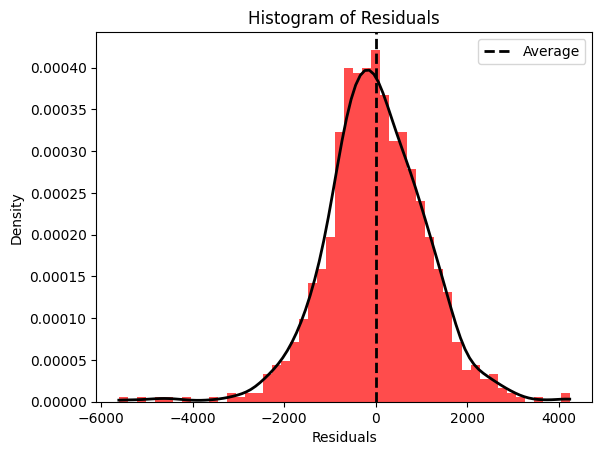

In [77]:
#Check Assumptions of Regression
#Normality of residuals
hist_residuals(regmodel_4)

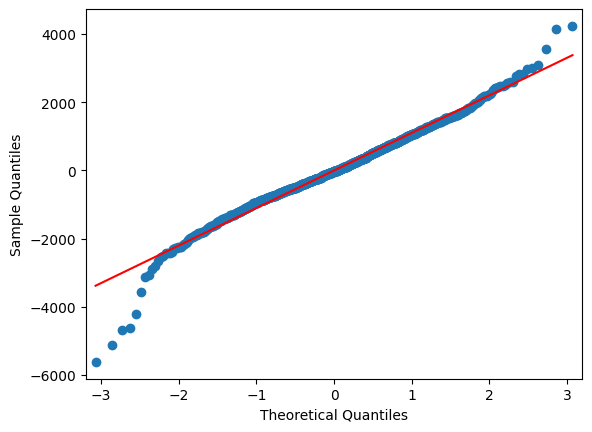

In [78]:
#QQ-plot
sm.qqplot(regmodel_4.resid, line = 's')
plt.show()

In [79]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for 
# Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

regmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     465.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          6.56e-297
Time:                        05:23:33   Log-Likelihood:                -7809.2
No. Observations:                 927   AIC:                         1.563e+04
Df Residuals:                     919   BIC:                         1.567e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5971.1404   1169.423      5.106      0.000    3676.091    8266.190
Age          -113.3504      2.938    -38.581      0.000    -119.116    -107.584
CC              0.9141      0.317      2.879      0.004       0.291       1.537
Weight          8.8168      1.166      7.560      0.000       6.528      11.106
KM_Scaled    -404.5351     56.749     -7.129      0.000    -515.907    -293.163
KM_Scaled_2   -66.6309     24.586     -2.710      0.007    -114.882     -18.380
Automatic_1   379.2156    167.635      2.262      0.024      50.223     708.208
IfPetrol_NP -1155.3554    188.183     -6.140      0.000   -1524.674    -786.037
==============================================================================
Omnibus:                       59.152   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.980
Skew:                          -0.264   Prob(JB):                     1.36e-39
Kurtosis:                       5.087   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

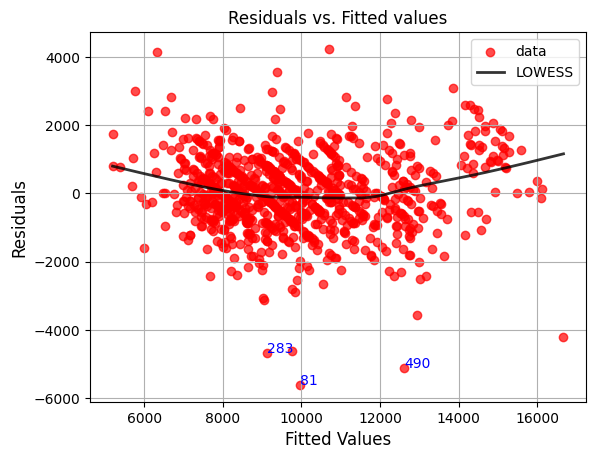

In [80]:
#Residuals vs. Fitted Values
residuals_fittedvalues_plot(regmodel_4)

In [81]:
#Remove Cases(be cautious!)
#observations with greates residual
regmodel_4.resid.sort_values(ascending = False)[:5]

113    4239.891755
947    4164.087720
802    3569.376531
9      3084.604608
943    2992.193560
dtype: float64

In [82]:
regmodel_4.resid.sort_values(ascending = True)[:5]

81    -5616.886217
490   -5124.538967
283   -4678.392161
292   -4619.939386
111   -4220.998799
dtype: float64

In [83]:
#Remove Cases(be cautious!)
X_train2 = X_train.drop(index = [81,111, 113, 283, 292, 490, 543, 849, 947])
y_train2 = y_train.drop(index = [81,111, 113, 283, 292, 490, 543, 849, 947])

In [84]:
#Regression Model
regmodel = sm.OLS(y_train2, X_train2)
regmodel_4 = regmodel.fit()
regmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     603.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:23:34   Log-Likelihood:                -7626.7
No. Observations:                 918   AIC:                         1.527e+04
Df Residuals:                     910   BIC:                         1.531e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6047.3022   1536.124     -3.937      0.000   -9062.060   -3032.544
Age          -105.0458      2.755    -38.132      0.000    -110.452     -99.639
CC             -0.6548      0.321     -2.037      0.042      -1.286      -0.024
Weight         21.9999      1.617     13.607      0.000      18.827      25.173
KM_Scaled    -434.4216     51.411     -8.450      0.000    -535.320    -333.524
KM_Scaled_2   -62.9105     22.129     -2.843      0.005    -106.339     -19.482
Automatic_1    41.3024    152.533      0.271      0.787    -258.056     340.660
IfPetrol_NP -1255.9426    173.104     -7.255      0.000   -1595.671    -916.214
==============================================================================
Omnibus:                        4.842   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.423
Skew:                           0.084   Prob(JB):                       0.0664
Kurtosis:                       3.337   Cond. No.                     8.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

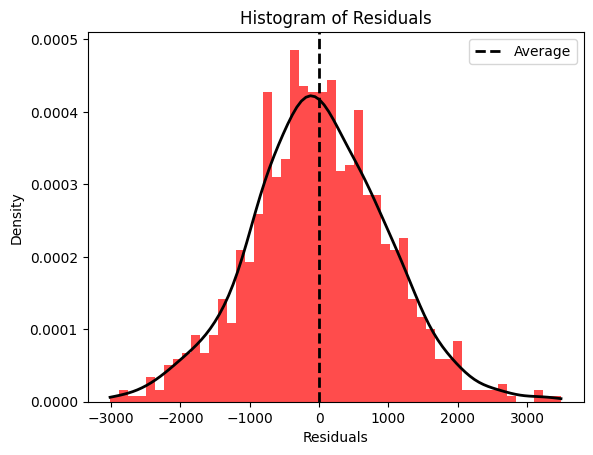

In [85]:
#Check Assumptions of Regression
#Normality of residuals
hist_residuals(regmodel_4)

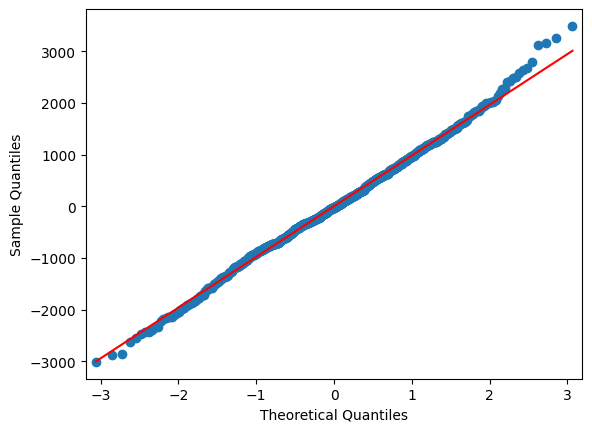

In [86]:
#QQ-plot
sm.qqplot(regmodel_4.resid, line = 's')
plt.show()

In [87]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for 
# Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

regmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     603.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:23:36   Log-Likelihood:                -7626.7
No. Observations:                 918   AIC:                         1.527e+04
Df Residuals:                     910   BIC:                         1.531e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6047.3022   1536.124     -3.937      0.000   -9062.060   -3032.544
Age          -105.0458      2.755    -38.132      0.000    -110.452     -99.639
CC             -0.6548      0.321     -2.037      0.042      -1.286      -0.024
Weight         21.9999      1.617     13.607      0.000      18.827      25.173
KM_Scaled    -434.4216     51.411     -8.450      0.000    -535.320    -333.524
KM_Scaled_2   -62.9105     22.129     -2.843      0.005    -106.339     -19.482
Automatic_1    41.3024    152.533      0.271      0.787    -258.056     340.660
IfPetrol_NP -1255.9426    173.104     -7.255      0.000   -1595.671    -916.214
==============================================================================
Omnibus:                        4.842   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.423
Skew:                           0.084   Prob(JB):                       0.0664
Kurtosis:                       3.337   Cond. No.                     8.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

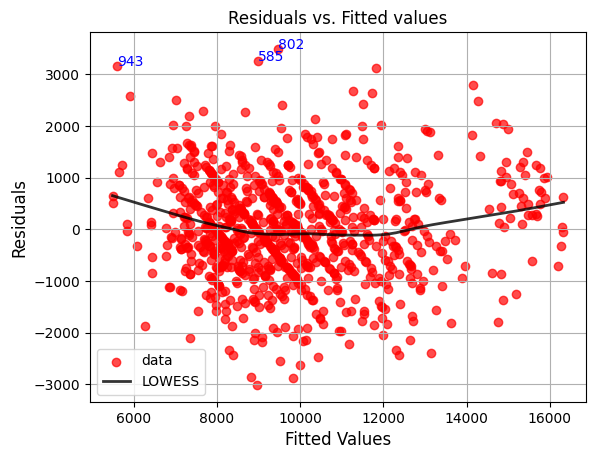

In [88]:
#Residuals vs. Fitted Values
residuals_fittedvalues_plot(regmodel_4)

In [89]:
#Check Cook's Distance
influencer_detector(regmodel_4)

(array([], dtype=int64),)

We will remove 'Automatic_1' because the P-value exceeds the acceptable threshold. (0,05)

In [90]:
#Final Regression Model

#Remove Automatic
X_train2 = X_train2.drop(columns = ['Automatic_1'])

#Regression Model
regmodel = sm.OLS(y_train2, X_train2)
regmodel_4 = regmodel.fit()
regmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     704.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:23:37   Log-Likelihood:                -7626.7
No. Observations:                 918   AIC:                         1.527e+04
Df Residuals:                     911   BIC:                         1.530e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6153.7941   1484.171     -4.146      0.000   -9066.585   -3241.003
Age          -104.9155      2.711    -38.699      0.000    -110.236     -99.595
CC             -0.6670      0.318     -2.096      0.036      -1.291      -0.043
Weight         22.1126      1.561     14.162      0.000      19.048      25.177
KM_Scaled    -435.9094     51.091     -8.532      0.000    -536.178    -335.640
KM_Scaled_2   -62.6833     22.101     -2.836      0.005    -106.059     -19.308
IfPetrol_NP -1258.7728    172.700     -7.289      0.000   -1597.709    -919.837
==============================================================================
Omnibus:                        4.829   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.406
Skew:                           0.084   Prob(JB):                       0.0670
Kurtosis:                       3.336   Cond. No.                     8.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
#Number of removed observation < 1%
(X_train.shape[0] - X_train2.shape[0]) / X_train.shape[0] * 100

0.9708737864077669

## Test the Model

In [92]:
#Coefficients of the Model
regmodel_4.params

const         -6153.794129
Age            -104.915496
CC               -0.666957
Weight           22.112634
KM_Scaled      -435.909356
KM_Scaled_2     -62.683320
IfPetrol_NP   -1258.772760
dtype: float64

In [93]:
#Extract features
regmodel_4.model.exog_names

['const', 'Age', 'CC', 'Weight', 'KM_Scaled', 'KM_Scaled_2', 'IfPetrol_NP']

In [94]:
#Confidence Intervals for Model Parameters
regmodel_4.conf_int(alpha = 0.05)

,0,1
const,-9066.585414,-3241.002843
Age,-110.236146,-99.594846
CC,-1.291383,-0.042531
Weight,19.048203,25.177065
KM_Scaled,-536.178312,-335.640399
KM_Scaled_2,-106.058846,-19.307794
IfPetrol_NP,-1597.708713,-919.836806


In [95]:
#Data preparation
test['KM_Scaled'] = (test['KM'] - test['KM'].mean()) / test['KM'].std()
test['KM_Scaled_2'] = test['KM_Scaled'] ** 2
test.loc[test['FuelType'] == 'Petrol', 'IfPetrol'] = 'P'
test.loc[test['FuelType'] != 'Petrol', 'IfPetrol'] = 'NP'
test.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_Scaled,KM_Scaled_2,IfPetrol
126,10950,44,60500,Petrol,110,0,0,1600,5,1075,-0.310320,0.096298,P
239,12750,33,27240,Petrol,110,1,0,1600,5,1075,-1.281025,1.641025,P
576,9450,67,99781,Petrol,110,1,0,1600,5,1085,0.836110,0.699080,P
437,10750,56,43700,Petrol,86,1,0,1300,3,1025,-0.800634,0.641015,P
333,11950,54,75231,Petrol,110,1,0,1600,5,1080,0.119610,0.014306,P


In [96]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(test[['IfPetrol']], dtype= int)
X_test  = pd.concat([test[['Age', 
                           'CC', 
                           'Weight', 
                           'KM_Scaled', 
                           'KM_Scaled_2']], 
                     dummies['IfPetrol_NP']], axis = 1)
X_test = sm.add_constant(X_test) # adding a constant
X_test.head()

,const,Age,CC,Weight,KM_Scaled,KM_Scaled_2,IfPetrol_NP
126,1.0,44,1600,1075,-0.310320,0.096298,0
239,1.0,33,1600,1075,-1.281025,1.641025,0
576,1.0,67,1600,1085,0.836110,0.699080,0
437,1.0,56,1300,1025,-0.800634,0.641015,0
333,1.0,54,1600,1080,0.119610,0.014306,0


In [97]:
X_train2.head()

,const,Age,CC,Weight,KM_Scaled,KM_Scaled_2,IfPetrol_NP
1057,1.0,78,1300,1015,0.626899,0.393002,0
427,1.0,56,1300,1035,-0.713920,0.509682,0
700,1.0,59,1600,1065,-0.040369,0.001630,0
804,1.0,62,1600,1065,-0.402417,0.161939,0
701,1.0,65,1600,1050,-0.041696,0.001739,0


In [98]:
#Prediction
test_pred = regmodel_4.predict(X_test)
test_pred

126    12063.109311
239    13543.490570
576     9333.655322
437    10078.166667
333    10942.246765
           ...     
881     8847.048649
584     8618.619255
815    10333.929200
797     9665.612427
231    12258.634793
Length: 398, dtype: float64

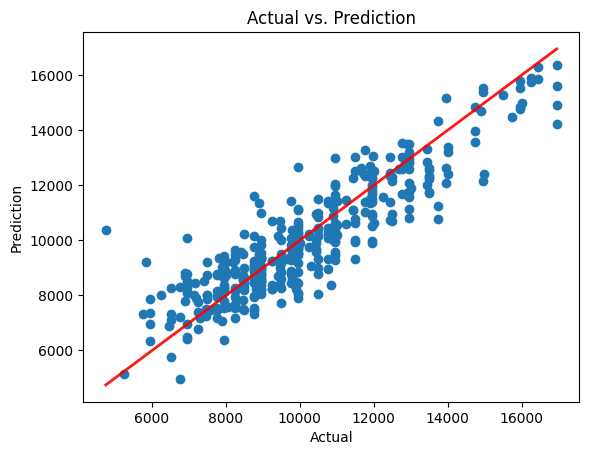

In [99]:
#Actual vs. Prediction
plt.scatter(x = test['Price'], y = test_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(test['Price'].min(), test['Price'].max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

In [100]:
#Absolute error mean, median, sd, max, min
abs_error = abs(test['Price'] - test_pred)
abs_error.describe()

count     398.000000
mean      809.357330
std       675.200385
min         0.900725
25%       317.144127
50%       638.583266
75%      1164.639628
max      5607.423854
dtype: float64

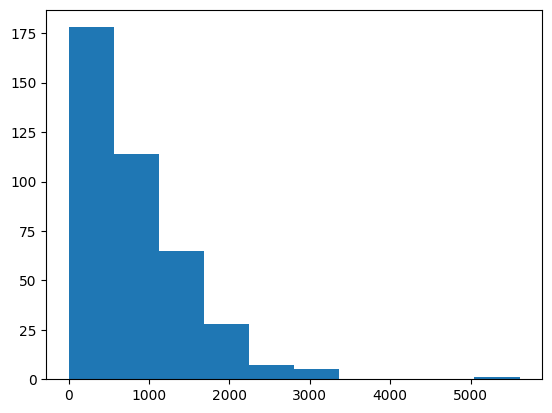

In [101]:
plt.hist(abs_error)
plt.show()

In [102]:
#Error percentage median, sd, mean, max, min
e_percent = round(abs(test['Price'] - test_pred) / test['Price'] * 100, 2)
e_percent.describe()

count    398.000000
mean       8.502211
std        9.014938
min        0.010000
25%        3.107500
50%        6.530000
75%       11.870000
max      118.050000
dtype: float64

In [103]:
#Marketing Requirement
sum(e_percent <= 15) / len(e_percent) * 100

85.17587939698493